In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (2).zip to archive (2).zip


In [ ]:
import shutil
source = '/content/archive (2).zip'
destination = '/content/drive/MyDrive/Colab Notebooks/dataset ham'

# Move file
shutil.move(source, destination)


'/content/drive/MyDrive/Colab Notebooks/dataset ham/archive (2).zip'

In [ ]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/skin_cancer_dataset.zip'
extract_folder = '/content/drive/MyDrive/Colab Notebooks/dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = '/content/drive/MyDrive/Colab Notebooks/dataset/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/dataset/test'

# Create train/val generators from the same directory
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% for validation
)

train_gen = datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# Test generator remains the same
test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 9504 images belonging to 2 classes.
Found 2375 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 88s 284ms/step - accuracy: 0.7102 - loss: 0.6625 - val_accuracy: 0.7731 - val_loss: 0.4962
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 41s 138ms/step - accuracy: 0.8437 - loss: 0.3594 - val_accuracy: 0.7811 - val_loss: 0.4778
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 85s 148ms/step - accuracy: 0.8530 - loss: 0.3451 - val_accuracy: 0.7777 - val_loss: 0.4745
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 40s 136ms/step - accuracy: 0.8577 - loss: 0.3332 - val_accuracy: 0.7655 - val_loss: 0.5044
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 42s 138ms/step - accuracy: 0.8585 - loss: 0.3213 - val_accuracy: 0.8080 - val_loss: 0.4626
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 82s 140ms/step - accuracy: 0.8690 - loss: 0.3151 - val_accuracy: 0.7634 - val_loss: 0.4659
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 44s 148ms/step - accuracy: 0.8727 - loss: 0.2969 - val_accuracy: 0.7933 - val_loss: 0.4635
Epoch 8/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 41s 137ms/step - accuracy: 0.8774 - loss: 0

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step


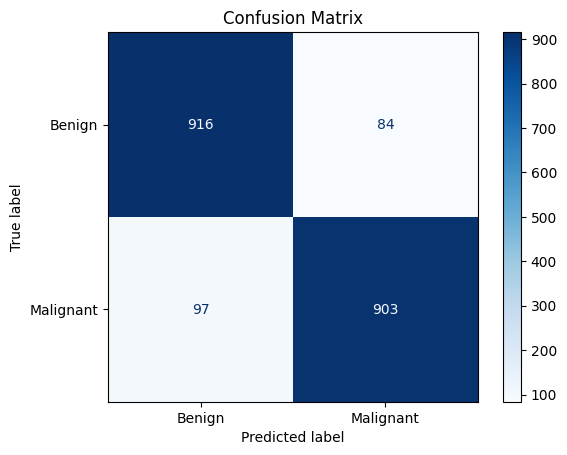

              precision    recall  f1-score   support

      Benign       0.90      0.92      0.91      1000
   Malignant       0.91      0.90      0.91      1000

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



In [ ]:
# Predict
y_true = test_gen.classes
y_pred_probs = model.predict(test_gen)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=['Benign', 'Malignant']))


In [ ]:
model.save('skin_cancer_model.h5')  # Save to a file


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks//content/skin_cancer_model(2).h5')


In [ ]:
model.save('/content/drive/MyDrive/Models//content/skin_cancer_model(2).h5')


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Models/content/skin_cancer_model(2).h5')


In [ ]:
print(train_gen.class_indices)


{'Benign': 0, 'Malignant': 1}


In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.3/323.3 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.0 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image

# Load trained model (trained on 128x128 images)
model = tf.keras.models.load_model("/content/drive/MyDrive/Models/content/skin_cancer_model(2).h5")

# Prediction function using 128x128 input and class mapping
def predict(image):
    img = image.resize((128, 128))  # ⬅️ Resize to 128x128
    arr = np.array(img) / 255.0
    arr = arr.reshape(1, 128, 128, 3)  # ⬅️ Update shape
    pred_prob = model.predict(arr)[0][0]

    class_idx = int(pred_prob >= 0.5)
    class_names = {0: "Benign", 1: "Malignant"}

    label = class_names[class_idx]
    confidence = f"{(pred_prob if class_idx == 1 else 1 - pred_prob) * 100:.2f}%"
    return label, confidence

# Build Gradio App
with gr.Blocks(css=".main{background: linear-gradient(to right, #eef2f3, #8e9eab); padding: 20px;}") as app:
    gr.Markdown("## 🧬 Skin Cancer Detection App - CNN Based")

    user_info = gr.State({})

    with gr.Tab("🏠 Home"):
        name = gr.Textbox(label="Your Name", placeholder="Enter your name")
        age = gr.Number(label="Age")
        gender = gr.Radio(choices=["Male", "Female", "Other"], label="Gender")
        next_btn = gr.Button("Next: Go to Detection")

        def save_user_info(n, a, g):
            return {"name": n, "age": a, "gender": g}

        next_btn.click(save_user_info, inputs=[name, age, gender], outputs=user_info)

    with gr.Tab("🔍 Detection"):
        img_input = gr.Image(type="pil", label="Upload Dermoscopic Image")
        detect_btn = gr.Button("Analyze Image")
        pred_label = gr.Textbox(label="Prediction")
        pred_conf = gr.Textbox(label="Confidence")

        def run_detection(image, state):
            label, conf = predict(image)
            state["prediction"] = label
            state["confidence"] = conf
            return label, conf, state

        detect_btn.click(run_detection, inputs=[img_input, user_info], outputs=[pred_label, pred_conf, user_info])

    with gr.Tab("📊 Summary"):
        summary_box = gr.HTML()

        def show_summary(state):
            status = "🟥 <b>Cancer</b>" if state.get("prediction") == "Malignant" else "🟩 <b>Non-Cancer</b>"
            return f"""
            <div style='font-size: 18px; padding: 10px; color: #333; background-color: #fff; border-radius: 12px; box-shadow: 0 0 10px rgba(0,0,0,0.1);'>
                <b>Name:</b> {state.get('name', '')}<br>
                <b>Age:</b> {state.get('age', '')}<br>
                <b>Gender:</b> {state.get('gender', '')}<br><br>
                <b>Prediction:</b> {state.get('prediction', '')}<br>
                <b>Confidence:</b> {state.get('confidence', '')}<br><br>
                <b>Status:</b> {status}
            </div>
            """

        detect_btn.click(show_summary, inputs=[user_info], outputs=summary_box)

app.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c6b90d2c599293c09b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
